In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os, glob
from scipy.optimize import curve_fit
plt.style.use("seaborn-whitegrid")
#plt.style.use("classic")
#plt.style.use("ggplot")
cm = 1/2.54

In [70]:
#conff0 = glob.glob('may_data/md10/data_A0**.txt'); md = 10
#conff0 = glob.glob('may_data/md20/data_A0**.txt'); md = 20
#conff0 = glob.glob('may_data/md30/data_A0**.txt'); md = 30
#conff0 = glob.glob('may_data/md40/data_A0**.txt'); md = 40
conff0 = glob.glob('may_data/md50/data_A0**.txt'); md = 50
conff0 = sorted(conff0)

In [71]:
conff0

['may_data/md50/data_A001.txt',
 'may_data/md50/data_A002.txt',
 'may_data/md50/data_A003.txt',
 'may_data/md50/data_A004.txt',
 'may_data/md50/data_A005.txt',
 'may_data/md50/data_A006.txt',
 'may_data/md50/data_A007.txt',
 'may_data/md50/data_A008.txt',
 'may_data/md50/data_A009.txt',
 'may_data/md50/data_A010.txt',
 'may_data/md50/data_A011.txt',
 'may_data/md50/data_A012.txt',
 'may_data/md50/data_A013.txt',
 'may_data/md50/data_A014.txt',
 'may_data/md50/data_A015.txt',
 'may_data/md50/data_A016.txt',
 'may_data/md50/data_A017.txt',
 'may_data/md50/data_A018.txt',
 'may_data/md50/data_A019.txt',
 'may_data/md50/data_A020.txt',
 'may_data/md50/data_A021.txt',
 'may_data/md50/data_A022.txt',
 'may_data/md50/data_A023.txt',
 'may_data/md50/data_A024.txt',
 'may_data/md50/data_A025.txt',
 'may_data/md50/data_A026.txt',
 'may_data/md50/data_A027.txt',
 'may_data/md50/data_A028.txt',
 'may_data/md50/data_A029.txt',
 'may_data/md50/data_A030.txt']

In [72]:
#conff0 = conff0[-9:]
#conff0

In [73]:
beads = 0; 

#jmp = 1 ; dt = 'dt0'; Dt = 0.1
#jmp = 10 ; dt = 'dt0'; Dt = 1 
#jmp = 20 ; dt = 'dt0'; Dt = 2
jmp = 30 ; dt = 'dt0'; Dt = 3
v00 = 0.8

v0 = 7.0; v_1 = 7.7; v1 = 7.8

conf0 = [];
xy0 = []; xy_1 = []; xy1 = [];
xdiff0 = []; ydiff0 = []; 

#conff0 = conff0[0:0]

for i in conff0:
    _ = pd.read_csv(i, names=['t','x','y','z'], delim_whitespace=True)
    #xy0_ = _[0::beads]
    xy0.append(_)
    _ = _[0::jmp]
    conf0.append(_)
    xdiff0.append(np.diff(_['x']))
    ydiff0.append(np.diff(_['y']))


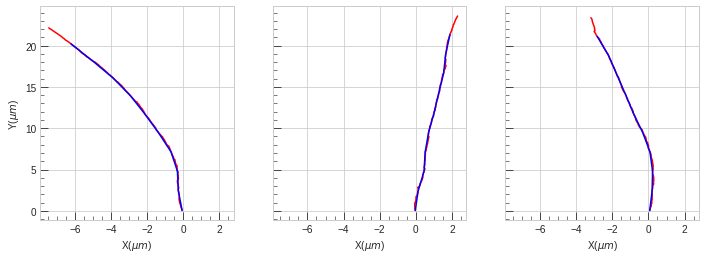

In [74]:
fig, ax = plt.subplots(1,3, figsize=(30*cm, 10*cm), sharex = True, sharey = True)

ax[0].plot(xy0[0]['x'], xy0[0]['y'], color='red')
ax[0].plot(conf0[0]['x'], conf0[0]['y'], color='blue')
ax[0].minorticks_on()
ax[0].tick_params('both', direction='in', length=8, which='major')
ax[0].tick_params('both', direction='in', length=4, which='minor')
ax[0].set_xlabel('X($\mu m$)')
ax[0].set_ylabel('Y($\mu m$)')

ax[1].plot(xy0[1]['x'], xy0[1]['y'], color='red')
ax[1].plot(conf0[1]['x'], conf0[1]['y'], color='blue')
ax[1].minorticks_on()
ax[1].tick_params('both', direction='in', length=8, which='major')
ax[1].tick_params('both', direction='in', length=4, which='minor')
ax[1].set_xlabel('X($\mu m$)')

ax[2].plot(xy0[2]['x'], xy0[2]['y'], color='red')
ax[2].plot(conf0[2]['x'], conf0[2]['y'], color='blue')
ax[2].minorticks_on()
ax[2].tick_params('both', direction='in', length=8, which='major')
ax[2].tick_params('both', direction='in', length=4, which='minor')
ax[2].set_xlabel('X($\mu m$)')

#plt.savefig('fig/may/Traj5-may-md40-Dt3.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [75]:
ubx0 = []; uby0 = []
ubx_1 = []; uby_1 = []
ubx1 = []; uby1 = []

for i in range(len(xdiff0)):
    b0 = np.sqrt(xdiff0[i]**2 + ydiff0[i]**2)
    ubx0.append(xdiff0[i]/b0)
    uby0.append(ydiff0[i]/b0)


In [76]:
ub0 = []; ub_1 = []; ub1 = []

for i in range(len(ubx0)):
    ub0.append(pd.DataFrame({'ubx':ubx0[i], 'uby':uby0[i]}))
    

In [77]:
_ = []; ds0 = []; dsm0 = []; s0 = []; c = 0; ds0_ = []; dsm_ = []; s_ = []

# try:
#     os.remove('ds_ub_status.txt')
# except:
#     print("'ds_ub_status.txt' does not exist.")
    
for h in range(len(ub0)):
    for i in range(len(ub0[h])): # -1
#         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
        for j in range(len(ub0[h])): # -1
            try:
                _.append(np.dot(ub0[h].loc[j].values,ub0[h].loc[j+i].values))
#                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
            except:
                pass #print("No: Ub%s.Ub%s"%(j,j+i))
        ds0_.append(_) # not necessary to save or is it?
        dsm_.append(np.mean(_))
        s_.append(c)
        _ = [] # empty this bucket
        c+=1;
    s0.append(s_)
    dsm0.append(dsm_)
    ds0.append(ds0_)
    c = 0; ds0_ = []; dsm_ = []; s_ = [] # reset stuff

s0 = np.array(s0)
#ds0 = np.array(ds0)
dsm0 = np.array(dsm0)

In [78]:

dfs0 = pd.DataFrame(s0.T)
dfdsm0 = pd.DataFrame(dsm0.T)

s0_m = dfs0.mean(axis=1)*v00*Dt
dsm0_m = dfdsm0.mean(axis=1)

#=========================================================

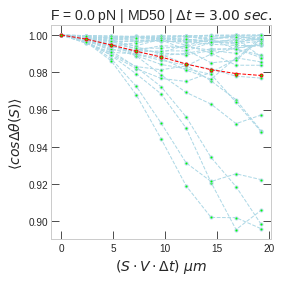

In [79]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

dts = [0.05,0.1,0.2,0.3,0.5]; c=4

# for i in range(len(s0m)):
#     ax.plot(s0m[i],dsm0[i], marker='o', markersize=3, ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = %.2f sec.$'%dts[c])
#     #c+=1
for i in range(len(conff0)): #7
    ax.plot(s0_m,dfdsm0[i], marker='o', markersize=3, ls='--', lw=1, color='lightblue', markerfacecolor='lime')#, label=r'$\Delta t = %.2f sec.$'%dts[c])
#for i in range(27,30): #7
#    ax.plot(dfs0[i],dfdsm0[i], marker='o', markersize=3, ls='--', lw=1, color='blue', markerfacecolor='lime')#, label=r'$\Delta t = %.2f sec.$'%dts[c])

#ax.plot(dfs0[19],dfdsm0[19], marker='o', markersize=3, ls='--', lw=1, color='blue', markerfacecolor='lime')
    
ax.plot(s0_m,dsm0_m, marker='o', markersize=3, ls='--', lw=1, color='red', markerfacecolor='lime')

#ax.minorticks_on()
ax.tick_params('both', direction='in', top=True, right=True, length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$(S \cdot V \cdot \Delta t)\ \mu m$', fontsize=14)
ax.set_ylabel(r'$\langle cos \Delta \theta (S) \rangle$', fontsize=14)

ax.set_title('F = 0.0 pN | MD%d | $\Delta t = %.2f\ sec.$'%(md,Dt), fontsize=14)
#plt.legend()
plt.grid(0)

#plt.savefig('fig/may/LpAllT5-may-md'+str(md)+'-Dt'+str(round(Dt,2))+'.pdf', format='pdf', bbox_inches='tight')

plt.show()


In [80]:
x = s0_m 
y = dsm0_m 
y = np.log(y)

In [81]:
# https://python4mpia.github.io/fitting_data/least-squares-fitting.html
# https://www.datatechnotes.com/2020/09/curve-fitting-with-curve-fit-function-in-python.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit
def func(x,Lp):
    return 1*(-x/(2*Lp))
params, covs = curve_fit(func, x, y)

In [82]:
print("params: ", params[0]) 

params:  407.8628699498341


In [83]:
print("covariance: ", covs[0]) 

covariance:  [67.41985043]


In [84]:
perr = np.sqrt(np.diag(covs[0]))
perr

array([[8.21095917]])

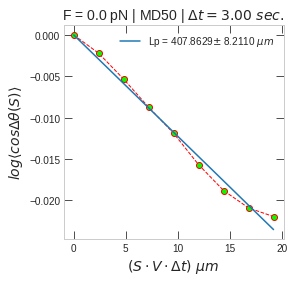

In [85]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharey=True)

ax.plot(x,y, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')#, label=r'$\Delta t = 0.1 sec.$')
ax.plot(x, func(x,*params), label=r'Lp = %.4f$\pm$ %.4f $\mu m$'%(params[0],perr)) # curve fit

#ax.minorticks_on()
ax.tick_params('both', direction='in', top=True, right=True, length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$(S \cdot V \cdot \Delta t)\ \mu m$', fontsize=14)
ax.set_ylabel(r'$log \langle cos \Delta \theta (S) \rangle$', fontsize=14)

ax.set_title('F = 0.0 pN | MD%d | $\Delta t = %.2f\ sec.$'%(md,Dt), fontsize=14)

ax.legend()
plt.grid(0)

#plt.savefig('fig/may/Lp-md'+str(md)+'-Dt'+str(round(Dt,2))+'.pdf', format='pdf', bbox_inches='tight')


plt.show()

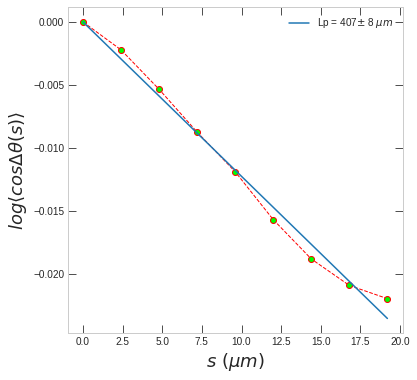

In [86]:
fig, ax = plt.subplots(1,1, figsize=(6,6), sharey=True)

ax.plot(x,y, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')#, label=r'$\Delta t = 0.1 sec.$')
ax.plot(x, func(x,*params), label=r'Lp = %d$\pm$ %d $\mu m$'%(params[0],perr)) # curve fit

#ax.minorticks_on()
ax.tick_params('both', direction='in', top=True, right=True, length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$s\ (\mu m)$', fontsize=18)
ax.set_ylabel(r'$log \langle cos \Delta \theta (s) \rangle$', fontsize=18)

#ax.set_title('F = 0.0 pN | MD%d | $\Delta t = %.2f\ sec.$'%(md,Dt), fontsize=14)

ax.legend()
plt.grid(0)

##plt.savefig('fig/may/Lp-md'+str(md)+'-Dt'+str(round(Dt,2))+'.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md'+str(md)+'-Dt'+str(round(Dt,2))+'.png', format='png', dpi=300, bbox_inches='tight')


plt.show()